In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
file = '..\\..\\para_result\\sint-ud\\test_record.pkl'
with open(file, 'rb') as file:
    udpinn_loaded_test_record = pickle.load(file)

file = '..\\..\\para_result\\sint-x\\test_record.pkl'
with open(file, 'rb') as file:
    xpinn_loaded_test_record = pickle.load(file)


In [6]:
def split_sequences(x_data, y_data):
    x_sequences = []
    y_sequences = []
    current_x_seq = [x_data[0]]
    current_y_seq = [y_data[0]]
    
    for i in range(1, len(x_data)):
        if x_data[i] > x_data[i - 1]:
            current_x_seq.append(x_data[i])
            current_y_seq.append(y_data[i])
        else:
            x_sequences.append(np.array(current_x_seq))
            y_sequences.append(np.array(current_y_seq))
            current_x_seq = [x_data[i]]
            current_y_seq = [y_data[i]]

    x_sequences.append(np.array(current_x_seq))
    y_sequences.append(np.array(current_y_seq))

    return x_sequences, y_sequences

udpinn_x_sequences = []
udpinn_y_sequences = []
xpinn_x_sequences = []
xpinn_y_sequences = []

for r in range(60):
    x_data_udpinn = udpinn_loaded_test_record[r][0]
    y_data_udpinn = udpinn_loaded_test_record[r][1]
    x_data_xpinn = xpinn_loaded_test_record[r][0]
    y_data_xpinn = xpinn_loaded_test_record[r][1]
    
    x_seq_udpinn, y_seq_udpinn = split_sequences(x_data_udpinn, y_data_udpinn)
    x_seq_xpinn, y_seq_xpinn = split_sequences(x_data_xpinn, y_data_xpinn)
    
    udpinn_x_sequences.append(x_seq_udpinn)
    udpinn_y_sequences.append(y_seq_udpinn)
    xpinn_x_sequences.append(x_seq_xpinn)
    xpinn_y_sequences.append(y_seq_xpinn)




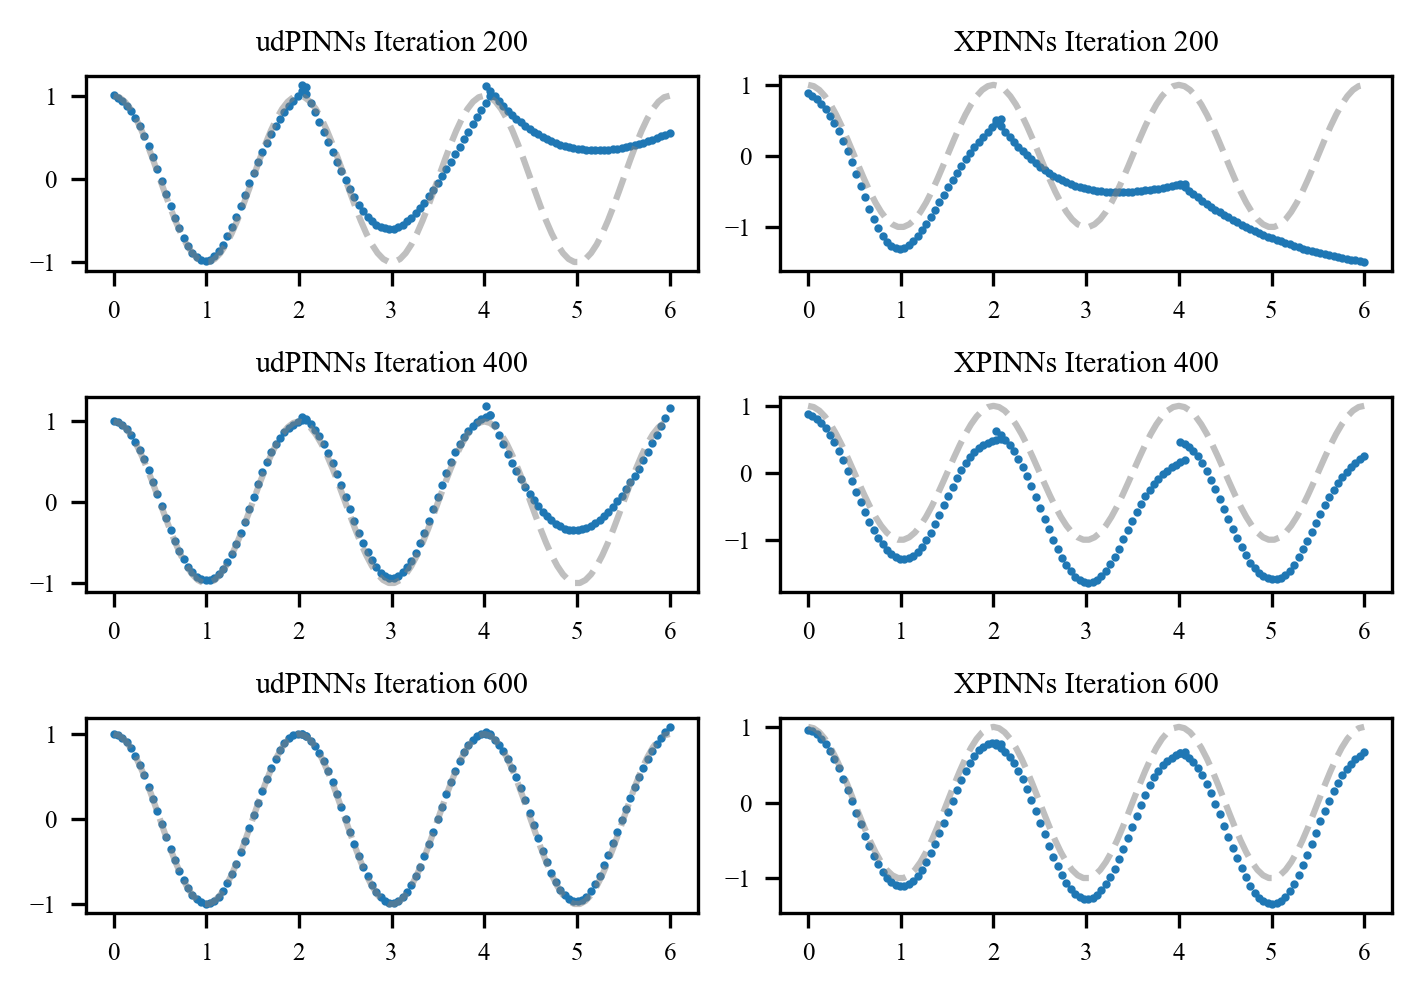

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 设置字体样式为 Times New Roman
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams.update({'font.size': 6})

# 加载数据
file = '..\\..\\para_result\\sint-ud\\test_record.pkl'
with open(file, 'rb') as file:
    udpinn_loaded_test_record = pickle.load(file)

file = '..\\..\\para_result\\sint-x\\test_record.pkl'
with open(file, 'rb') as file:
    xpinn_loaded_test_record = pickle.load(file)

# 设置绘制轮次
rounds = [19, 39, 59]

# 1. 绘制第一幅图
fig, axs = plt.subplots(len(rounds), 2, figsize=(4.72, 1.1 * len(rounds)), dpi=300)

x_cos = np.linspace(0, 6, 100)
y_cos = np.cos(np.pi*x_cos)

for idx, r in enumerate(rounds):
    # udPINNs
    axs[idx, 0].scatter(udpinn_loaded_test_record[r][0], udpinn_loaded_test_record[r][1], s=1)
    axs[idx, 0].plot(x_cos, y_cos, linestyle='--', color='gray', alpha=0.5)
    axs[idx, 0].set_title(f'udPINNs Iteration {(r+1)*10}')
    
    # XPINNs
    axs[idx, 1].scatter(xpinn_loaded_test_record[r][0], xpinn_loaded_test_record[r][1], s=1)
    axs[idx, 1].plot(x_cos, y_cos, linestyle='--', color='gray', alpha=0.5)
    axs[idx, 1].set_title(f'XPINNs Iteration {(r+1)*10}')

plt.tight_layout()
plt.savefig('sint-1.png', dpi=300, facecolor='white')
plt.show()




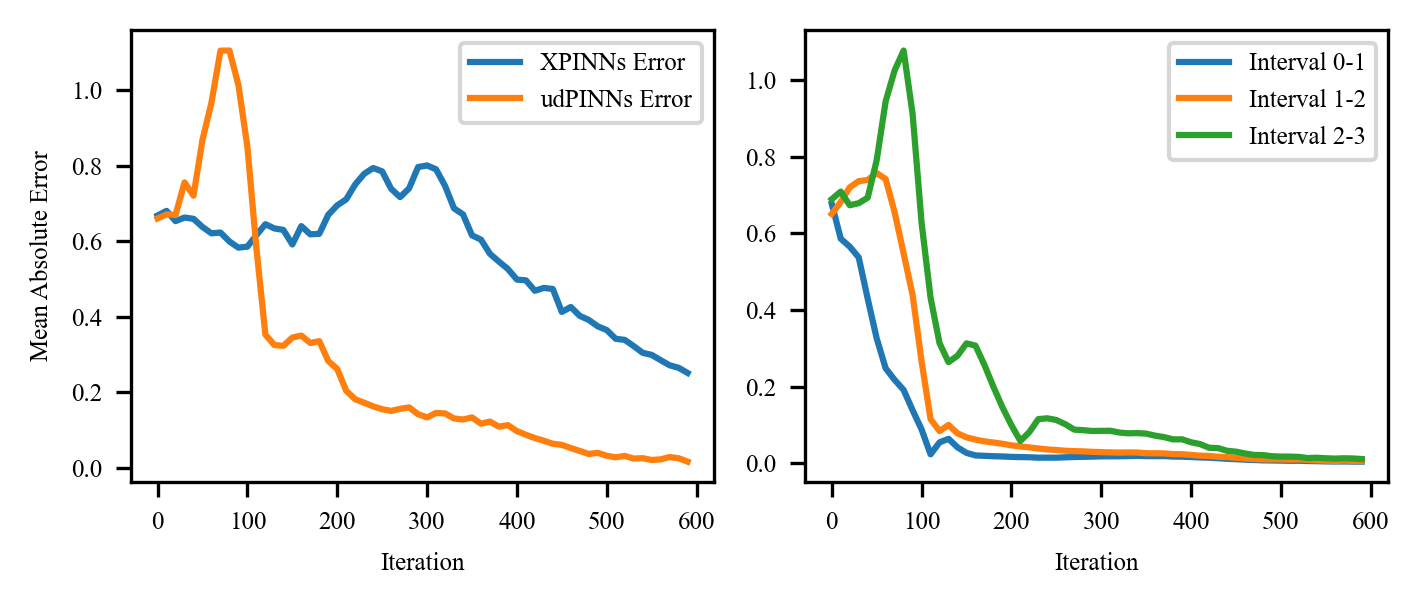

In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
file = '..\\..\\para_result\\sint-ud\\test_record.pkl'
with open(file, 'rb') as file:
    udpinn_loaded_test_record = pickle.load(file)

file = '..\\..\\para_result\\sint-x\\test_record.pkl'
with open(file, 'rb') as file:
    xpinn_loaded_test_record = pickle.load(file)

# 设置绘制轮次
rounds = np.arange(60)
# 2. 绘制第二幅图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4.72, 2), dpi = 300)

# 左图：XPINNs与udPINNs的误差图
udpinns_errors = []
xpinns_errors = []

for r in rounds:
    x_udpinns = udpinn_loaded_test_record[r][0]
    y_udpinns = udpinn_loaded_test_record[r][1]
    analytical_solution_udpinns = np.cos(np.pi*x_udpinns)
    udpinns_error = np.abs(analytical_solution_udpinns - y_udpinns).mean()
    udpinns_errors.append(udpinns_error)

    x_xpinns = xpinn_loaded_test_record[r][0]
    y_xpinns = xpinn_loaded_test_record[r][1]
    analytical_solution_xpinns = np.cos(np.pi*x_xpinns)
    xpinns_error = np.abs(analytical_solution_xpinns - y_xpinns).mean()
    xpinns_errors.append(xpinns_error)

ax1.plot(rounds*10, xpinns_errors, label='XPINNs Error')
ax1.plot(rounds*10, udpinns_errors, label='udPINNs Error')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Mean Absolute Error')
ax1.legend()

# 右图：udPINNs在[0,1]，[1,2]，[2,3]区间内的误差曲线
errors_per_interval = {f'{i}-{i + 1}': [] for i in range(3)}

for r in rounds:
    x_udpinns = udpinn_loaded_test_record[r][0]
    y_udpinns = udpinn_loaded_test_record[r][1]
    analytical_solution_udpinns = np.cos(np.pi*x_udpinns)
    udpinns_error = np.abs(analytical_solution_udpinns - y_udpinns)
    
    for i in range(3):
        interval_start = i
        interval_end = i + 1
        mask = (x_udpinns >= interval_start) & (x_udpinns < interval_end)
        interval_error = udpinns_error[mask].mean()
        errors_per_interval[f'{interval_start}-{interval_end}'].append(interval_error)

for interval, errors in errors_per_interval.items():
    ax2.plot(rounds*10, errors, label=f'Interval {interval}')

ax2.set_xlabel('Iteration')

ax2.legend()
plt.tight_layout()
plt.savefig('sint-2.png', dpi=300, facecolor='white')
plt.show()
